In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hypertools as hyp
%matplotlib notebook

In [348]:
data = pd.read_csv(r'C:\Users\jesse.pisel\Downloads\turner.csv')
d2 = data.iloc[0:, 0:-3]
d2.head()

,APINO,COMPANY,WELL_CLASS,HORIZ_DIR,Latitude,Longitude,IP_date_1st_prod,IP_date,IP_oil_volume_BBL,IP_gas_volume_MCF,...,Cumulative_Water_thru2016,Cumulative_Days_thru2016,BBLS_Oil_Day_thru2016,MCF_Day_thru2016,BBLS_Water_Day_thru2016,ProducingInterval_Length_ft,Cemented_Liner,SHLtoBHL_Lateral_length_ft,Length_Difference,Lateral_Azimuth
0,561452,ABRAXAS PETROLEUM CORPORATION,O,H,43.53,-105.40,20120311.0,20120430.0,148.00,1640.00,...,48689.0,1685.0,50.76,1124.73,28.90,3583.0,Y,4390.4,-807.4,167.7
1,923003,ABRAXAS PETROLEUM CORPORATION,O,H,43.26,-104.91,20000828.0,20091118.0,207.00,100.00,...,270.0,4600.0,9.15,8.02,0.06,3985.0,Y then N,4524.3,-539.3,43.8
2,2720996,ABRAXAS PETROLEUM CORPORATION,O,H,43.28,-104.89,20000829.0,20000925.0,235.00,193.00,...,0.0,5131.0,19.84,21.49,0.00,3061.0,N,4000.9,-939.9,328.0
3,928810,ANADARKO E&P ONSHORE LLC,O,H,42.92,-105.04,20130914.0,20130928.0,379.00,548.00,...,73931.0,1117.0,30.95,110.60,66.19,1166.0,N,3652.6,-2486.6,333.0
4,929130,ANADARKO E&P ONSHORE LLC,O,H,42.92,-105.04,20151220.0,20160120.0,537.22,1491.45,...,46019.0,364.0,238.57,683.71,126.43,3886.0,Y,5432.7,-1546.7,175.8


C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\hypertools\tools\format_data.py:141: UserWarning: Missing data: Inexact solution computed with PPCA (see https://github.com/allentran/pca-magic for details)
  warnings.warn('Missing data: Inexact solution computed with PPCA (see https://github.com/allentran/pca-magic for details)')


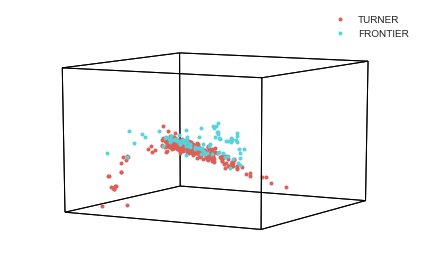

In [3]:
hyp.plot(d2, '.', hue=data.Prod_Download_Reservoir.values, legend=list(set(data.Prod_Download_Reservoir.values)))

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

In [78]:
d3 = d2.drop(['Cemented_Liner'], axis=1).fillna(0)

In [13]:
X = d3.iloc[0:,6:].values
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data.Prod_Download_Reservoir.values)
Y = le.transform(data.Prod_Download_Reservoir.values)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, random_state=86)

In [15]:
feat_labels = d3.columns[6:].values

In [22]:
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
feature = list(zip(feat_labels, clf.feature_importances_))


In [17]:
clf.score(X_test, y_test)

0.8974358974358975

In [31]:
sorted(feature, key=lambda tup: tup[1])

[('IP_Total_Fluid_gal', 0.0034302109981065613),
 ('IP_Total_Slurry_gal', 0.003597669748521163),
 ('First_Yr_GasProduced', 0.009718013940709471),
 ('First_12Months_OilProd', 0.009937425531435737),
 ('First_18Months_OilProd', 0.009984831799435635),
 ('First_9Months_OilProd', 0.010315144238219479),
 ('First_6Months_OilProd', 0.011675254572923944),
 ('First_Yr_OilProduced', 0.01241340473365199),
 ('Cumulative_Oil_thru2016', 0.012712772929419153),
 ('Cumulative_Gas_thru2016', 0.013406343870239524),
 ('BBLS_Oil_Day_thru2016', 0.013489642593657928),
 ('First_2.5-3.5_Months_OilProd', 0.014441888472461471),
 ('Cumulative_Days_thru2016', 0.014623812625318127),
 ('First_18Months_GasProd', 0.01463853271872074),
 ('First_12Months_GasProd', 0.015021648351773576),
 ('Cumulative_Days', 0.015442627302789768),
 ('Cumulative_Oil', 0.015803134868861965),
 ('IP_gas_gravity', 0.015877205195294515),
 ('Cumulative_Gas', 0.01628198768795399),
 ('First_9Months_GasProd', 0.01775451995281406),
 ('IP_gas_volume_MC

In [349]:
#d2 = data[data['Prod_Download_Reservoir'] == 'FRONTIER'].iloc[0:, 0:-3]
d3 = d2.drop(['Cemented_Liner'], axis=1).fillna(0)

In [350]:
from sklearn.ensemble import RandomForestRegressor

In [366]:
xx = d3.drop(['APINO', 'COMPANY', 'WELL_CLASS', 'HORIZ_DIR', 
       'First_2.5-3.5_Months_OilProd', 'First_6Months_OilProd',
       'First_9Months_OilProd', 'First_12Months_OilProd',
       'First_18Months_OilProd', 'First_Yr_GasProduced',
       'First_2.5-3.5_Months_GasProd', 'First_6Months_GasProd',
       'First_9Months_GasProd', 'First_12Months_GasProd',
       'First_18Months_GasProd', 'Cumulative_Oil', 'Cumulative_Gas',
       'Cumulative_Water', 'Cumulative_Days', 'BBLS_Oil_Day', 'MCF_Day',
       'BBLS_Water_Day', 'Cumulative_Oil_thru2016', 'Cumulative_Gas_thru2016',
       'Cumulative_Water_thru2016', 'Cumulative_Days_thru2016',
       'BBLS_Oil_Day_thru2016', 'MCF_Day_thru2016', 'BBLS_Water_Day_thru2016', 'First_Yr_OilProduced', 
        'Calculated_GOR_RT_ft3perbbl', 'IP_water_volume_BBL', 'IP_oil_volume_BBL', 'IP_gas_volume_MCF'
       ], axis=1)
yy = d3['First_6Months_OilProd'].values

In [367]:
X_train, X_test, y_train, y_test = train_test_split(xx, yy, test_size=0.1, random_state=86)

In [368]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [369]:
feat_labels = xx.columns.values
feature = list(zip(feat_labels, rf.feature_importances_))
sorted(feature, key=lambda tup: tup[1])

[('IP_Total_Slurry_gal', 0.001589849782231749),
 ('IP_Total_Fluid_gal', 0.0016708913162018463),
 ('IP_Total_Fluid_BBL', 0.005379304565805268),
 ('Length_Difference', 0.02703427952329141),
 ('IP_gas_gravity', 0.02862222893154486),
 ('SHLtoBHL_Lateral_length_ft', 0.03428001572371959),
 ('IP_Total_Slurry_BBL', 0.03636133306384375),
 ('Lateral_Azimuth', 0.03984564527086541),
 ('Number_Fracs', 0.042821760583467774),
 ('ProducingInterval_Length_ft', 0.04656692335942088),
 ('IP_GOR', 0.04818703114956834),
 ('Latitude', 0.049633443496381685),
 ('IP_oil_gravity', 0.05297112092659402),
 ('IP_date', 0.08970001858013875),
 ('IP_date_1st_prod', 0.09963744000584747),
 ('Longitude', 0.18771003611285259),
 ('Total_Proppant_lbs', 0.20798867760822462)]

In [370]:
a = np.array(sorted(feature))[:,0]
b  = np.array(sorted(feature))[:,1]
#print('\n'.join(map(str, a)))
print('\n'.join(map(str, b)))

0.04818703114956834
0.005379304565805268
0.0016708913162018463
0.03636133306384375
0.001589849782231749
0.08970001858013875
0.09963744000584747
0.02862222893154486
0.05297112092659402
0.03984564527086541
0.049633443496381685
0.02703427952329141
0.18771003611285259
0.042821760583467774
0.04656692335942088
0.03428001572371959
0.20798867760822462


In [371]:
print('\n'.join(map(str, a)))

IP_GOR
IP_Total_Fluid_BBL
IP_Total_Fluid_gal
IP_Total_Slurry_BBL
IP_Total_Slurry_gal
IP_date
IP_date_1st_prod
IP_gas_gravity
IP_oil_gravity
Lateral_Azimuth
Latitude
Length_Difference
Longitude
Number_Fracs
ProducingInterval_Length_ft
SHLtoBHL_Lateral_length_ft
Total_Proppant_lbs
